In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
import cv2
from tensorflow.keras.models import load_model

In [3]:
data=[]
label=[]
train_dir=r'C:\Users\HP\Desktop\traffic_Data\DATA'
test_dir=r'C:\Users\HP\Desktop\traffic_Data\Test'

In [4]:
classes = { 
            0:'Speed limit (5km/h)',
            1:'Speed limit (15km/h)',
            2:'Speed limit (30km/h)',
            3:'Speed limit (40km/h)',
            4:'Speed limit (50km/h)',
            5:'Speed limit (60km/h)',
            6:'Speed limit (70km/h)',
            7:'speed limit (80km/h)',
            8:'Dont Go straight or left',
            9:'Dont Go straight or Right',
            10:'Dont Go straight',
            11:'Dont Go Left',
            12:'Dont Go Left or right',
            13:'Dont Go Right',
            14:'Dont overtake from Left',
            15:'No Uturn',
            16:'No Car',
            17:'No horn',
            18:'Speed limit (40km/h)',
            19:'Speed limit (50km/h)',
            20:'Go straight or right',
            21:'Go straight',
            22:'Go Left',
            23:'Go Left or right',
            24:'Go Right',
            25:'keep Left',
            26:'keep Right',
            27:'Roundabout mandatory',
            28:'watch out for cars',
            29:'Horn',
            30:'Bicycles crossing',
            31:'Uturn',
            32:'Road Divider',
            33:'Traffic signals',
            34:'Danger Ahead',
            35:'Zebra Crossing',
            36:'Bicycles crossing',
            37:'Children crossing',
            38:'Dangerous curve to the left',
            39:'Dangerous curve to the right',
            40:'Unknown1',
            41:'Unknown2',
            42:'Unknown3',
            43:'Go right or straight',
            44:'Go left or straight',
            45:'Unknown4',
            46:'ZigZag Curve',
            47:'Train Crossing',
            48:'Under Construction',
            49:'Unknown5',
            50:'Fences',
            51:'Heavy Vehicle Accidents',
            52:'Unknown6',
            53:'Give Way',
            54:'No stopping',
            55:'No entry',
            56:'Unknown7',
            57:'Unknown8',
}

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=.1/255,validation_split=0.2)

In [6]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)
validation_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 3359 images belonging to 58 classes.
Found 811 images belonging to 58 classes.


In [7]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '43': 38,
 '44': 39,
 '45': 40,
 '46': 41,
 '47': 42,
 '48': 43,
 '49': 44,
 '5': 45,
 '50': 46,
 '51': 47,
 '52': 48,
 '53': 49,
 '54': 50,
 '55': 51,
 '56': 52,
 '57': 53,
 '6': 54,
 '7': 55,
 '8': 56,
 '9': 57}

In [8]:
test_generator=ImageDataGenerator(rescale=.1/255).flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=1,
    class_mode=None,
    shuffle=True
)

Found 1994 images belonging to 1 classes.


In [9]:
batchX  = test_generator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
type(batchX[0])
batchX.dtype
batchX[0]

Batch shape=(1, 224, 224, 3), min=0.000, max=0.100


array([[[0.0427451 , 0.06392157, 0.09647059],
        [0.0427451 , 0.06392157, 0.09647059],
        [0.0427451 , 0.06392157, 0.09647059],
        ...,
        [0.04470588, 0.06470588, 0.09529412],
        [0.04470588, 0.06470588, 0.09529412],
        [0.04470588, 0.06470588, 0.09529412]],

       [[0.0427451 , 0.06392157, 0.09647059],
        [0.0427451 , 0.06392157, 0.09647059],
        [0.0427451 , 0.06392157, 0.09647059],
        ...,
        [0.04470588, 0.06470588, 0.09529412],
        [0.04470588, 0.06470588, 0.09529412],
        [0.04470588, 0.06470588, 0.09529412]],

       [[0.0427451 , 0.06392157, 0.09647059],
        [0.0427451 , 0.06392157, 0.09647059],
        [0.0427451 , 0.06392157, 0.09647059],
        ...,
        [0.04470588, 0.06470588, 0.09529412],
        [0.04470588, 0.06470588, 0.09529412],
        [0.04470588, 0.06470588, 0.09529412]],

       ...,

       [[0.0517647 , 0.07137255, 0.09803922],
        [0.0517647 , 0.07137255, 0.09803922],
        [0.05215686, 0

In [10]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical")])


In [11]:
model=Sequential()
model.add(data_augmentation)
model.add(Conv2D(128, kernel_size=(5,5), activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(58,activation='softmax'))


In [12]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20
)

Epoch 1/20


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential_1/max_pooling2d/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\HP\AppData\Local\Temp\ipykernel_4220\650016675.py", line 3, in <module>
      model.fit(train_generator,
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "C:\Users\HP\anaconda3\envs\tenserflow\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential_1/max_pooling2d/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[16,128,220,220] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential_1/max_pooling2d/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_7687]

In [1]:
model.save("trafik_model_yenidatasetv3.h5")
#model.save_weighs("trafik_model_yenidatasetv3_weighs.h5")

NameError: name 'model' is not defined

In [14]:
model.evaluate(validation_generator,
    steps=STEP_SIZE_VALID)

50/50 [==============================] - 8s 161ms/step - loss: 4.5756 - accuracy: 0.4462


[4.575644016265869, 0.44624999165534973]

In [17]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels.items())

dict_items([(0, '0'), (1, '1'), (2, '10'), (3, '11'), (4, '12'), (5, '13'), (6, '14'), (7, '15'), (8, '16'), (9, '17'), (10, '18'), (11, '19'), (12, '2'), (13, '20'), (14, '21'), (15, '22'), (16, '23'), (17, '24'), (18, '25'), (19, '26'), (20, '27'), (21, '28'), (22, '29'), (23, '3'), (24, '30'), (25, '31'), (26, '32'), (27, '33'), (28, '34'), (29, '35'), (30, '36'), (31, '37'), (32, '38'), (33, '39'), (34, '4'), (35, '40'), (36, '41'), (37, '42'), (38, '43'), (39, '44'), (40, '45'), (41, '46'), (42, '47'), (43, '48'), (44, '49'), (45, '5'), (46, '50'), (47, '51'), (48, '52'), (49, '53'), (50, '54'), (51, '55'), (52, '56'), (53, '57'), (54, '6'), (55, '7'), (56, '8'), (57, '9')])


In [24]:
yuklenen_model=load_model(r'C:\Users\HP' +'\\' +'trafik_model_yenidatasetv3.h5')

[[[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  7 246   4]
  [  3 251   1]
  [  0 255   0]]

 ...

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [147 166  94]
  [ 54 222  34]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [ 66 216  43]
  [ 24 241  16]
  [  0 255   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]]
uint8
(224, 224, 3)


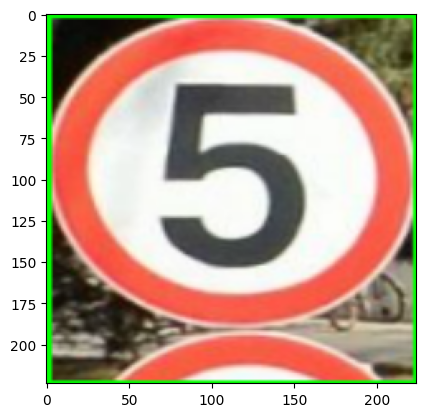

In [31]:
filename=r'C:\Users\HP\.spyder-py3\imgsign.png'
img=Image.open(filename)
img=img.resize((224,224))
img=np.array(img)
print(img)
print(img.dtype)
print(img.shape)
plt.imshow(img)    



In [26]:
img=tf.expand_dims(img,axis=0)
pred=yuklenen_model.predict(img)

1/1 [==============================] - 1s 1s/step


In [27]:
print(pred)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [28]:
index=int(labels[np.argmax(pred)])
print(np.argmax(pred))
print(index)

0
0


In [29]:
classes[index]

'Speed limit (5km/h)'